# 05 – Model Evaluation & Insights
Evaluating performance and explaining results.

In [1]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Load processed data
df = pd.read_csv("../data/processed/cleaned_data.csv")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Prepare features and target
X = df.drop("price_lkr", axis=1)
y = df["price_lkr"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Dataset shape: (19051, 108)
Columns: ['perch', 'bedrooms', 'bathrooms', 'kitchen_area_sqft', 'parking_spots', 'has_garden', 'has_ac', 'floors', 'price_lkr', 'house_age', 'total_rooms', 'area_per_room', 'luxury_score', 'district_Anuradhapura', 'district_Badulla', 'district_Batticaloa', 'district_Colombo', 'district_Galle', 'district_Gampaha', 'district_Hambantota', 'district_Jaffna', 'district_Kalutara', 'district_Kandy', 'district_Kegalle', 'district_Kilinochchi', 'district_Kurunegala', 'district_Mannar', 'district_Matale', 'district_Matara', 'district_Monaragala', 'district_Mullaitivu', 'district_Nuwara Eliya', 'district_Polonnaruwa', 'district_Puttalam', 'district_Ratnapura', 'district_Trincomalee', 'district_Vavuniya', 'area_Ambalantota', 'area_Ampara Central', 'area_Badulla Town', 'area_Bambalapitiya', 'area_Bandarawela', 'area_Batticaloa Town', 'area_Beruwala', 'area_Borella', 'area_China Bay', 'area_Chunnakam', 'area_Dehiwala', 'area_Eravur', 'area_Galle Fort', 'area_Gampaha Town

In [ ]:
best_model = joblib.load("../models/best_random_forest_model.pkl")
print(f"Loaded model: {type(best_model).__name__}")

y_pred = best_model.predict(X_test)
print(f"Predictions shape: {y_pred.shape}")

feature_names = joblib.load("../models/feature_names.pkl")
print(f"Number of features: {len(feature_names)}")

Loaded model: RandomForestRegressor
Predictions shape: (3811,)
Number of features: 107


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  
medae = np.median(np.abs(y_test - y_pred)) 

print("=== Model Performance Metrics ===")
print(f"Mean Absolute Error (MAE): LKR {mae:,.0f}")
print(f"Root Mean Squared Error (RMSE): LKR {rmse:,.0f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Median Absolute Error: LKR {medae:,.0f}")

print("\n=== Performance Interpretation ===")
if r2 > 0.9:
    print("Excellent model performance (R² > 0.9)")
elif r2 > 0.8:
    print("Good model performance (R² > 0.8)")
elif r2 > 0.7:
    print("Fair model performance (R² > 0.7)")
else:
    print("Model needs improvement (R² < 0.7)")

price_range = y_test.max() - y_test.min()
print(f"Price range in test set: LKR {y_test.min():,.0f} - LKR {y_test.max():,.0f}")
print(f"MAE as % of price range: {mae/price_range*100:.2f}%")

=== Model Performance Metrics ===
Mean Absolute Error (MAE): LKR 1,502,912
Root Mean Squared Error (RMSE): LKR 2,121,223
R² Score: 0.9485
Mean Absolute Percentage Error (MAPE): 12.11%
Median Absolute Error: LKR 1,023,238

=== Performance Interpretation ===
Excellent model performance (R² > 0.9)
Price range in test set: LKR 1,500,000 - LKR 42,482,436
MAE as % of price range: 3.67%


=== Feature Importance Analysis ===
Top 15 Most Important Features:
 1. perch                          0.5832
 4. kitchen_area_sqft              0.2228
16. district_Colombo               0.0555
22. district_Kandy                 0.0195
18. district_Gampaha               0.0143
84. area_Nuwara Eliya Central      0.0138
31. district_Nuwara Eliya          0.0133
 9. house_age                      0.0127
17. district_Galle                 0.0113
20. district_Jaffna                0.0066
21. district_Kalutara              0.0053
 8. floors                         0.0043
11. area_per_room                  0.0037
12. luxury_score                   0.0027
 7. has_ac                         0.0025


C:\Users\DELL\AppData\Local\Temp\ipykernel_16484\15013753.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


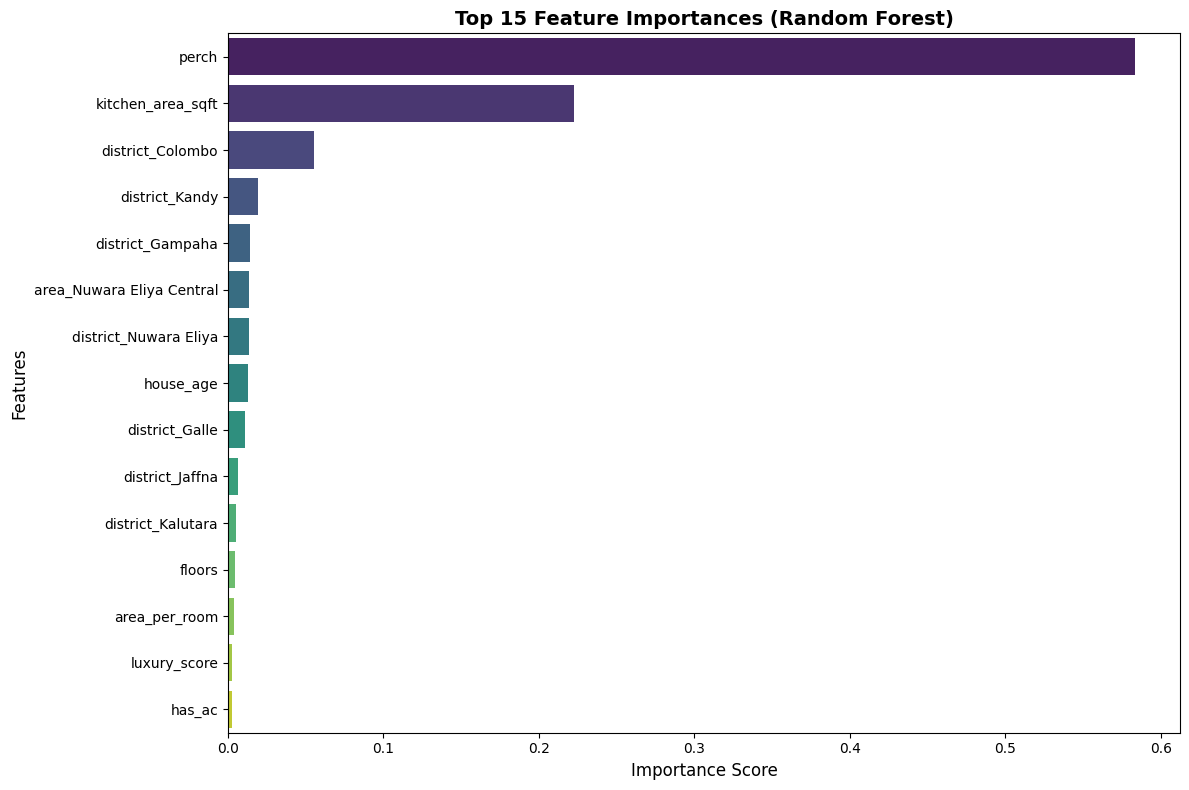


Top 10 features explain 95.3% of predictions
Top 20 features explain 98.1% of predictions


In [ ]:
if hasattr(best_model, 'feature_importances_'):
    print("=== Feature Importance Analysis ===")

    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Display top 15 features
    print("Top 15 Most Important Features:")
    for i, row in importance_df.head(15).iterrows():
        print(f"{i+1:2d}. {row['feature']:<30} {row['importance']:.4f}")

    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
    plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.savefig('../plots/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Cumulative importance
    importance_df['cumulative_importance'] = importance_df['importance'].cumsum()
    print(f"\nTop 10 features explain {importance_df.iloc[:10]['importance'].sum():.1%} of predictions")
    print(f"Top 20 features explain {importance_df.iloc[:20]['importance'].sum():.1%} of predictions")

else:
    print("Model doesn't support feature importance analysis")

=== Residuals Analysis ===
Mean residual: 39231.04
Median residual: -22039.95
Residuals std: 2121138.35
Min residual: -11198006.88
Max residual: 12107066.32


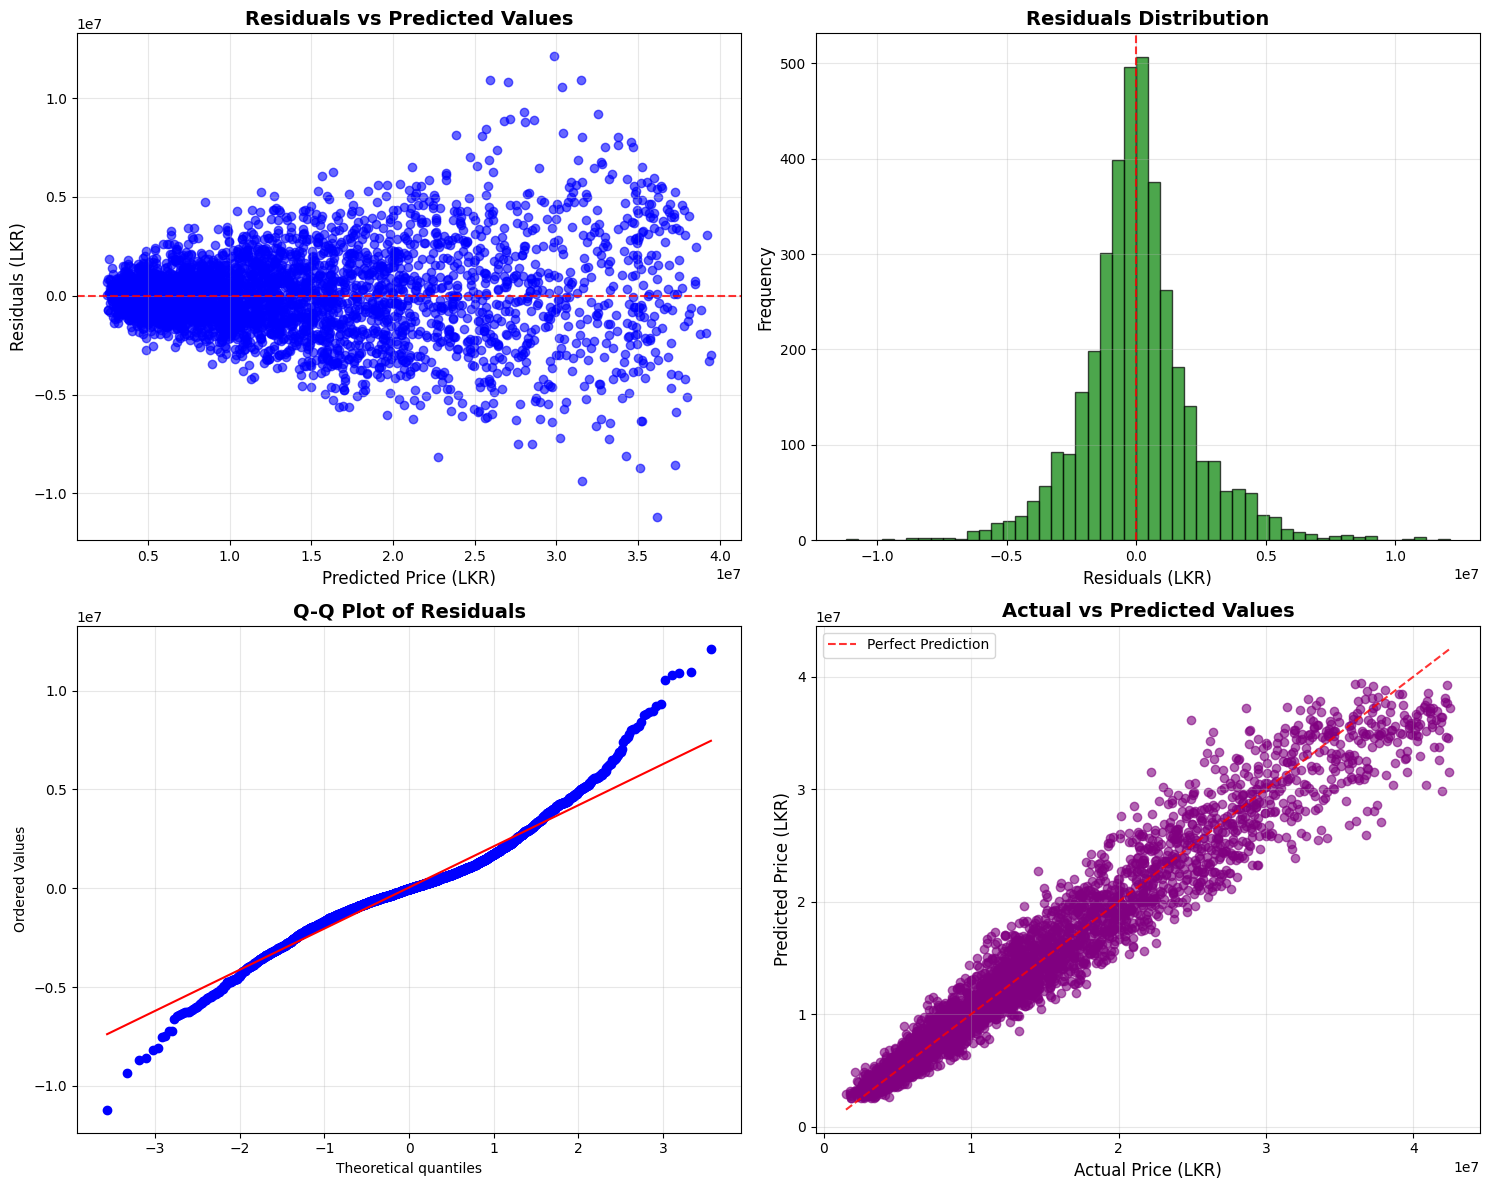


Heteroscedasticity check (R² of |residuals| vs predicted): 0.2987


In [ ]:
print("=== Residuals Analysis ===")

residuals = y_test - y_pred

print(f"Mean residual: {residuals.mean():.2f}")
print(f"Median residual: {residuals.median():.2f}")
print(f"Residuals std: {residuals.std():.2f}")
print(f"Min residual: {residuals.min():.2f}")
print(f"Max residual: {residuals.max():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuals vs Predicted
axes[0,0].scatter(y_pred, residuals, alpha=0.6, color='blue')
axes[0,0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0,0].set_xlabel('Predicted Price (LKR)', fontsize=12)
axes[0,0].set_ylabel('Residuals (LKR)', fontsize=12)
axes[0,0].set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# 2. Residuals distribution
axes[0,1].hist(residuals, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.8)
axes[0,1].set_xlabel('Residuals (LKR)', fontsize=12)
axes[0,1].set_ylabel('Frequency', fontsize=12)
axes[0,1].set_title('Residuals Distribution', fontsize=14, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Q-Q plot for normality check
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Actual vs Predicted
axes[1,1].scatter(y_test, y_pred, alpha=0.6, color='purple')
# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Perfect Prediction')
axes[1,1].set_xlabel('Actual Price (LKR)', fontsize=12)
axes[1,1].set_ylabel('Predicted Price (LKR)', fontsize=12)
axes[1,1].set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for heteroscedasticity
from sklearn.linear_model import LinearRegression
residuals_abs = np.abs(residuals)
lr = LinearRegression()
lr.fit(y_pred.reshape(-1, 1), residuals_abs)
r_squared = lr.score(y_pred.reshape(-1, 1), residuals_abs)
print(f"\nHeteroscedasticity check (R² of |residuals| vs predicted): {r_squared:.4f}")
if r_squared > 0.1:
    print("Warning: Possible heteroscedasticity detected")
else:
    print("Residuals appear homoscedastic")

=== Prediction Intervals Analysis ===
Prediction interval coverage (95%): 93.3%
Average interval width: LKR 8,314,710


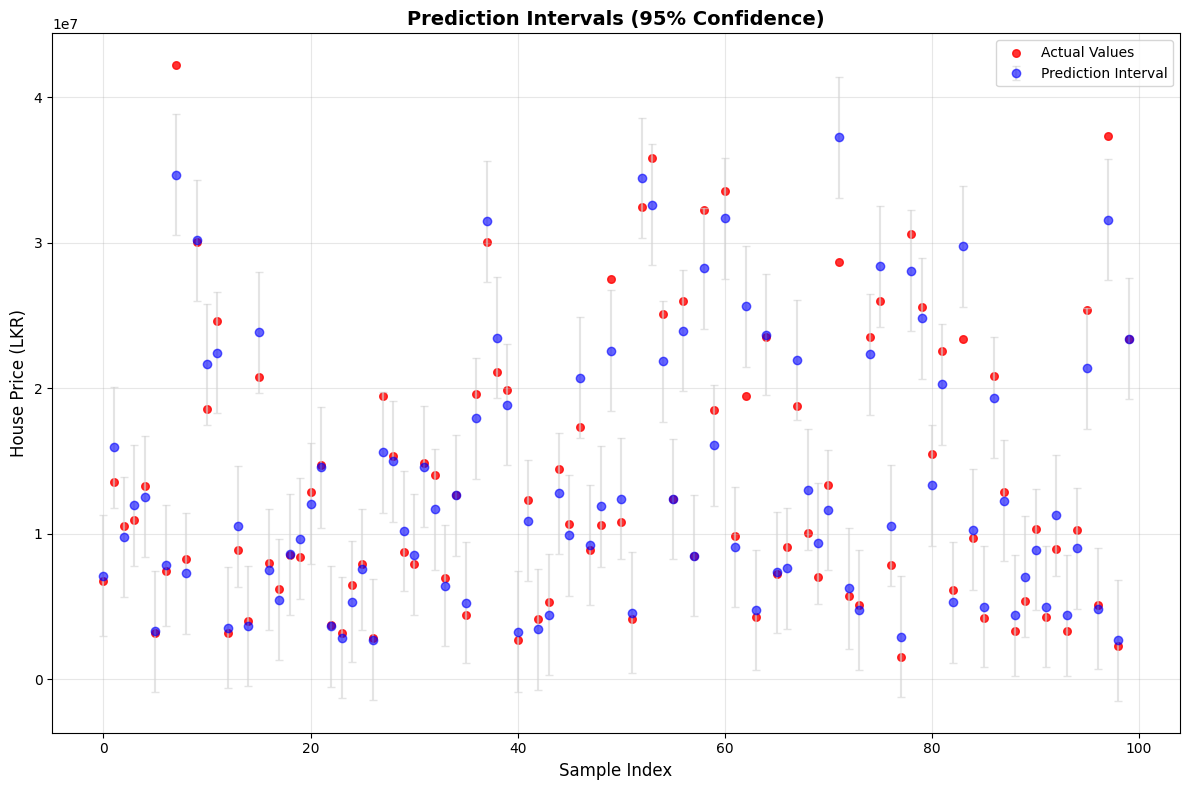

In [6]:
# Prediction intervals using quantile regression approach
print("=== Prediction Intervals Analysis ===")

# Calculate prediction intervals using residuals
residual_std = residuals.std()
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Prediction intervals
pred_lower = y_pred - z_score * residual_std
pred_upper = y_pred + z_score * residual_std

# Calculate coverage
within_interval = (y_test >= pred_lower) & (y_test <= pred_upper)
coverage = within_interval.mean()

print(f"Prediction interval coverage ({confidence_level*100:.0f}%): {coverage:.1%}")
print(f"Average interval width: LKR {(pred_upper - pred_lower).mean():,.0f}")

# Plot prediction intervals for a sample
sample_size = 100
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

plt.figure(figsize=(12, 8))
plt.errorbar(range(sample_size), y_pred[sample_indices],
             yerr=z_score * residual_std, fmt='o', alpha=0.6,
             color='blue', ecolor='lightgray', capsize=3,
             label='Prediction Interval')
plt.scatter(range(sample_size), y_test.iloc[sample_indices],
            color='red', alpha=0.8, s=30, label='Actual Values')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('House Price (LKR)', fontsize=12)
plt.title('Prediction Intervals (95% Confidence)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../plots/prediction_intervals.png', dpi=300, bbox_inches='tight')
plt.show()

=== Error Analysis by Price Range ===


C:\Users\DELL\AppData\Local\Temp\ipykernel_16484\798721363.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_range = error_analysis.groupby('price_range').agg({
C:\Users\DELL\AppData\Local\Temp\ipykernel_16484\798721363.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='absolute_error', data=error_analysis, palette='Set2')


Error Analysis by Price Range:
            absolute_error                               percentage_error  \
                      mean      median         std count             mean   
price_range                                                                 
Very Low         571248.41   454307.37   473482.60   763            15.05   
Low              911604.77   735902.22   713342.79   762            12.80   
Medium          1361552.97  1121841.75  1086055.91   762            12.07   
High            1872612.54  1621474.60  1396409.03   762            11.03   
Very High       2798765.72  2468939.26  2073732.35   762             9.58   

                    
            median  
price_range         
Very Low     11.24  
Low          10.92  
Medium       10.11  
High          9.52  
Very High     8.68  


C:\Users\DELL\AppData\Local\Temp\ipykernel_16484\798721363.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='percentage_error', data=error_analysis, palette='Set3')


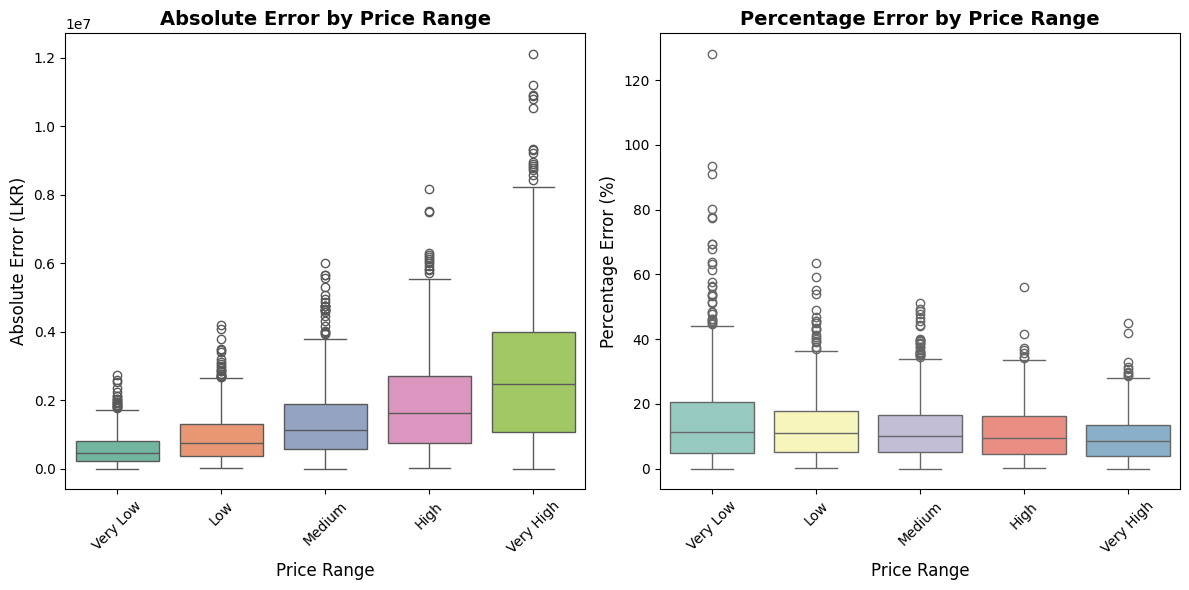

In [7]:
# Error analysis by price range
print("=== Error Analysis by Price Range ===")

# Create price bins
price_bins = pd.qcut(y_test, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
error_analysis = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'absolute_error': np.abs(residuals),
    'percentage_error': np.abs(residuals / y_test) * 100,
    'price_range': price_bins
})

# Group by price range and calculate metrics
error_by_range = error_analysis.groupby('price_range').agg({
    'absolute_error': ['mean', 'median', 'std', 'count'],
    'percentage_error': ['mean', 'median']
}).round(2)

print("Error Analysis by Price Range:")
print(error_by_range)

# Visualize error by price range
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='price_range', y='absolute_error', data=error_analysis, palette='Set2')
plt.title('Absolute Error by Price Range', fontsize=14, fontweight='bold')
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Absolute Error (LKR)', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='price_range', y='percentage_error', data=error_analysis, palette='Set3')
plt.title('Percentage Error by Price Range', fontsize=14, fontweight='bold')
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Percentage Error (%)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../plots/error_by_price_range.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Model insights and recommendations
print("=== Model Insights & Recommendations ===")

print(" MODEL PERFORMANCE SUMMARY:")
print(f"• Best Model: Random Forest Regressor")
print(f"• R² Score: {r2:.4f} ({r2*100:.1f}% of variance explained)")
print(f"• MAE: LKR {mae:,.0f} (average prediction error)")
print(f"• Prediction Interval Coverage: {coverage:.1%} at 95% confidence")

print(" KEY FINDINGS:")
print("• Top predictors:", ', '.join(importance_df.head(5)['feature'].tolist()))
print(f"• Model performs best in {error_by_range['absolute_error']['mean'].idxmin()} price range")
print(f"• Model performs worst in {error_by_range['absolute_error']['mean'].idxmax()} price range")

# Save evaluation results
evaluation_results = {
    'model_name': 'Random Forest',
    'r2_score': r2,
    'mae': mae,
    'rmse': rmse,
    'mape': mape,
    'coverage_95': coverage,
    'top_features': importance_df.head(10)['feature'].tolist(),
    'evaluation_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

joblib.dump(evaluation_results, '../models/evaluation_results.pkl')
print(" Evaluation results saved to models/evaluation_results.pkl")


=== Model Insights & Recommendations ===
 MODEL PERFORMANCE SUMMARY:
• Best Model: Random Forest Regressor
• R² Score: 0.9485 (94.8% of variance explained)
• MAE: LKR 1,502,912 (average prediction error)
• Prediction Interval Coverage: 93.3% at 95% confidence
 KEY FINDINGS:
• Top predictors: perch, kitchen_area_sqft, district_Colombo, district_Kandy, district_Gampaha
• Model performs best in Very Low price range
• Model performs worst in Very High price range
 Evaluation results saved to models/evaluation_results.pkl
